# Sentiment Classification


In [1]:
import numpy as np
import pandas as pd
import itertools

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM,GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import Callback


Using TensorFlow backend.


In [2]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/Project/R9_SeqNLP_Project')

## Loading the dataset

In [ ]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size
# vocab_size is no.of words to consider from the dataset, ordering based on frequency.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [ ]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print("Train_Categories:", np.unique(y_train))
print("Test_Categories:", np.unique(y_test))

print("TrainData_Shape:", x_train.shape)#number of review, number of words in each review
print("TestData_Shape:", x_test.shape)#number of review, number of words in each review




Data Analysis Summary:


1.   In the IMDB dataset we have 25000 movie review and each review have 300 words in the Train & Test data
2.   In both Train & Test data we have two categories (1 & 0). Here, 1 means Postive sentiment & 0 means Negative Sentiments 



### Get the word index and then Create a key-value pair for word and word_id (20 points)

In [ ]:
#Get each word index of IMDB dataset 
word_index = imdb.get_word_index() 

In [ ]:
# Get top 20 Key & Value pair from IMDB Dataset 
N = 20
# Get first N items in dictionary  
sliced_word_index = dict(itertools.islice(word_index.items(), N)) 
for key,value in sliced_word_index.items():
  print("{0}:{1}".format(key,value))

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [ ]:
#Get the movie review comment & sentimnet for 10th index in the train data
movieReview = " ".join( [reverse_word_index.get(i - 3, "#") for i in x_train[10]] )
print("Movie Review : \n "+ movieReview)
print("Sentiment Analysis :  "+ str(y_train[10]))

### Build a Sequential Model using Keras for the Sentiment Classification task (20 points)

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
EMBEDDING_DIM=100

#### Sequence NLP - LSTM Model for SENTIMENT ANALYSIS ON IMDB MOVIE DATASET

In [0]:
#Build sentiment analysis model with simple LSTM model
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=maxlen))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))

In [0]:
#Compile the model
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
#Get LSTM model summary
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [0]:
best_model="/content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_LSTM_SentimentClassification.hdf5"

In [0]:
#Let's use earlystopper & checkpointer to save beter model during training through callback function
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)
checkpointer = ModelCheckpoint(filepath=best_model, verbose=1, save_best_only=True)

In [31]:
#Train the LSTM model with 30 Epoch & 512 batch size
history_LSTM = model_LSTM.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    callbacks=[checkpointer, earlystopper]
)




Train on 22500 samples, validate on 2500 samples
Epoch 1/30





22500/22500 [==============================] - 33s 1ms/step - loss: 0.6221 - acc: 0.6662 - val_loss: 0.5625 - val_acc: 0.7056

Epoch 00001: val_loss improved from inf to 0.56252, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_LSTM_SentimentClassification.hdf5
Epoch 2/30
22500/22500 [==============================] - 24s 1ms/step - loss: 0.4104 - acc: 0.8241 - val_loss: 0.3779 - val_acc: 0.8364

Epoch 00002: val_loss improved from 0.56252 to 0.37794, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_LSTM_SentimentClassification.hdf5
Epoch 3/30
22500/22500 [==============================] - 24s 1ms/step - loss: 0.2963 - acc: 0.8833 - val_loss: 0.3647 - val_acc: 0.8408

Epoch 00003: val_loss improved from 0.37794 to 0.36474, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_LSTM_SentimentClassification.hdf5
Epoch 4/30
22500/22500 [=================

### Plot Accuracy & Loss for the LSTM Model

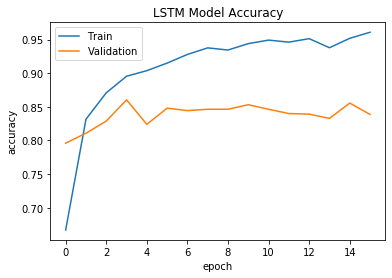

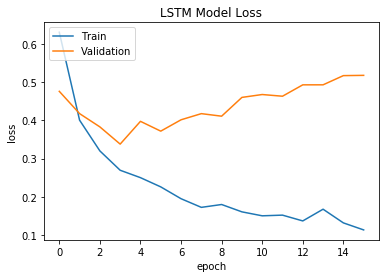

In [0]:
# summarize history for accuracy
plt.plot(history_LSTM.history['acc'])
plt.plot(history_LSTM.history['val_acc'])
plt.title('LSTM Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Sequence NLP - GRU Model for SENTIMENT ANALYSIS ON IMDB MOVIE DATASET

In [0]:
#Let's try sentiment analysis with GRU model and see this performance for this IMDB dataset

In [0]:
#Build sentiment analysis model with simple LSTM model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=maxlen))
model_GRU.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(1, activation='sigmoid'))


In [0]:
model_GRU.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
model_GRU.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,012,801
Trainable params: 1,012,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
best_model="/content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_GRU_SentimentClassification.hdf5"

In [0]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath=best_model, verbose=1, save_best_only=True)

In [103]:
#Train the GRU model with 30 Epoch & 512 batch size
history_GRU = model_GRU.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    callbacks=[checkpointer, earlystopper]
)

Train on 22500 samples, validate on 2500 samples
Epoch 1/30
22500/22500 [==============================] - 21s 921us/step - loss: 0.6600 - acc: 0.6187 - val_loss: 0.5609 - val_acc: 0.7160

Epoch 00001: val_loss improved from inf to 0.56092, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_GRU_SentimentClassification.hdf5
Epoch 2/30
22500/22500 [==============================] - 20s 871us/step - loss: 0.4575 - acc: 0.7916 - val_loss: 0.4410 - val_acc: 0.7876

Epoch 00002: val_loss improved from 0.56092 to 0.44101, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_GRU_SentimentClassification.hdf5
Epoch 3/30
22500/22500 [==============================] - 20s 867us/step - loss: 0.3620 - acc: 0.8486 - val_loss: 0.4326 - val_acc: 0.7964

Epoch 00003: val_loss improved from 0.44101 to 0.43258, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_GRU_SentimentClassification.hdf5
Epoch 4/30
22500/22500 [======================

### Plot Accuracy & Loss for the GRU Model

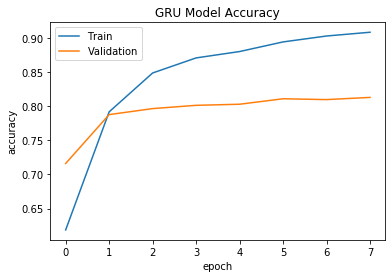

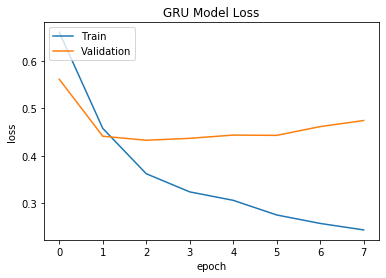

In [104]:
# summarize history for accuracy
plt.plot(history_GRU.history['acc'])
plt.plot(history_GRU.history['val_acc'])
plt.title('GRU Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Build LSTM model using Pre-trained Embedding

In [0]:
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
from keras.initializers import Constant

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
review_lines = list()
lines = reverse_word_index.values()

In [0]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [0]:
for line in lines:
  tokens = word_tokenize(line)
  #convert to lowercase
  tokens = [w.lower() for w in tokens]
  #remove puchation and numbers from each word
  words = [remove_special_characters(w,remove_digits=True) for w in tokens]
  #filter out stopwords
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  review_lines.append(words)

In [70]:
len(review_lines)

88584

In [0]:
#create and train word2vec model
word2vec_model = gensim.models.Word2Vec(sentences = review_lines, size=EMBEDDING_DIM, window=5, min_count=1, workers=4)

In [73]:
words = list(word2vec_model.wv.vocab)
print("vocabilary size : %d"%len(words))

vocabilary size : 73723


In [74]:
word2vec_model.wv.most_similar(positive = "terrible")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('renovating', 0.39094120264053345),
 ('elton', 0.3895918130874634),
 ('gurantee', 0.37426793575286865),
 ('minneapolis', 0.3708842396736145),
 ('megatron', 0.36676648259162903),
 ('accordian', 0.36608368158340454),
 ('novodny', 0.36312055587768555),
 ('allurement', 0.3608793616294861),
 ('grisby', 0.36071911454200745),
 ('lucille', 0.350883424282074)]

In [75]:
#save model
filename = "/content/drive/My Drive/Project/R9_SeqNLP_Project/imdb_embedding_word2vec.txt"
word2vec_model.wv.save_word2vec_format(filename,binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#creating embedding matrix
import os
embedding_index = {}
f = open(os.path.join('',filename))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embedding_index[word]=coefs
f.close()

In [0]:
num_words = len(reverse_word_index) + 1

In [80]:
num_words

88585

In [0]:
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

In [86]:
embedding_matrix.shape

(88585, 100)

In [0]:
for i, word in reverse_word_index.items():
  if i > num_words:
    continue
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [0]:
#Bulding model using Pre-trained Embedding
model_PreTrainedEmbedding=Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable = False)
model_PreTrainedEmbedding.add(embedding_layer)
model_PreTrainedEmbedding.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_PreTrainedEmbedding.add(Dense(1, activation='sigmoid'))

In [0]:
model_PreTrainedEmbedding.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [93]:
model_PreTrainedEmbedding.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          8858500   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 8,975,877
Trainable params: 117,377
Non-trainable params: 8,858,500
_________________________________________________________________


In [0]:
best_model="/content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_PreTrained_LSTM_SentimentClassification.hdf5"

In [0]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)
checkpointer = ModelCheckpoint(filepath=best_model, verbose=1, save_best_only=True)

In [96]:
#Train the GRU model with 30 Epoch & 512 batch size
history_PreTrainedModel = model_PreTrainedEmbedding.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    callbacks=[checkpointer, earlystopper]
)

Train on 22500 samples, validate on 2500 samples
Epoch 1/30
22500/22500 [==============================] - 23s 1ms/step - loss: 0.6931 - acc: 0.5038 - val_loss: 0.6929 - val_acc: 0.5124

Epoch 00001: val_loss improved from inf to 0.69288, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_PreTrained_LSTM_SentimentClassification.hdf5
Epoch 2/30
22500/22500 [==============================] - 22s 975us/step - loss: 0.6930 - acc: 0.4999 - val_loss: 0.6929 - val_acc: 0.4968

Epoch 00002: val_loss did not improve from 0.69288
Epoch 3/30
22500/22500 [==============================] - 22s 970us/step - loss: 0.6928 - acc: 0.5156 - val_loss: 0.6928 - val_acc: 0.4876

Epoch 00003: val_loss improved from 0.69288 to 0.69277, saving model to /content/drive/My Drive/Project/R9_SeqNLP_Project/R9_Proj_PreTrained_LSTM_SentimentClassification.hdf5
Epoch 4/30
22500/22500 [==============================] - 22s 1000us/step - loss: 0.6940 - acc: 0.5139 - val_loss: 0.6918 - val_acc: 0.5

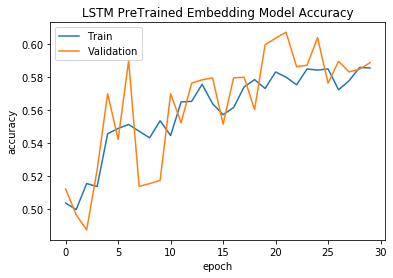

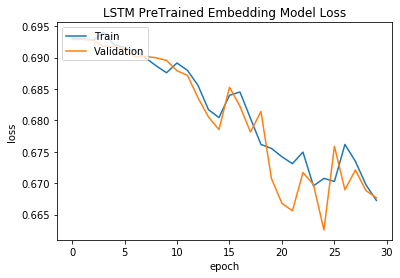

In [97]:
# summarize history for accuracy
plt.plot(history_PreTrainedModel.history['acc'])
plt.plot(history_PreTrainedModel.history['val_acc'])
plt.title('LSTM PreTrained Embedding Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_PreTrainedModel.history['loss'])
plt.plot(history_PreTrainedModel.history['val_loss'])
plt.title('LSTM PreTrained Embedding Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Report the Accuracy of the model (10 points)

In [105]:
#Evaluate RNN-LSTM model with Test Data
model_LSTM_result=model_LSTM.evaluate(x_test, y_test,verbose=1)

25000/25000 [==============================] - 143s 6ms/step


In [106]:
#Evaluate RNN-GRU model with Test Data
model_GRU_result=model_GRU.evaluate(x_test, y_test,verbose=1)


25000/25000 [==============================] - 115s 5ms/step


In [107]:
#Evaluate RNN-LSTM PreTrained Embedding model with Test Data
model_PreTrainedEmbedding_result=model_PreTrainedEmbedding.evaluate(x_test, y_test,verbose=1)

25000/25000 [==============================] - 135s 5ms/step


In [0]:
model_Result=pd.DataFrame(index=["Model Name","Accuracy","Loss"])
model_Result["LSTM"]=["LSTM",("%0.2f" % ((model_LSTM_result[1]*100))),("%0.2f" % ((model_LSTM_result[0])))]
model_Result["GRU"]=["GRU",("%0.2f" % ((model_GRU_result[1]*100))),("%0.2f" % ((model_GRU_result[0])))]
model_Result["LSTM Pretrained Embedding"]=["LSTM Pretrained Embedding",("%0.2f" % ((model_PreTrainedEmbedding_result[1]*100))),("%0.2f" % ((model_PreTrainedEmbedding_result[0])))]


In [109]:
model_Result

,LSTM,GRU,LSTM Pretrained Embedding
Model Name,LSTM,GRU,LSTM Pretrained Embedding
Accuracy,83.44,81.48,57.28
Loss,0.55,0.47,0.67


#### Summary:


> When we compare our 3 models (LSTM, GRU and LSTM pre-Trained Embedding model) for IMDB dataset, we able to get good accuracy in the LSTM model (83.87%) in 30 Epoachs. 









### Retrieve the output of each layer in Keras for a given single test sample from the trained model you built (10 points)

In [0]:
#Get single random index value from test data
testData_RandIndex=np.random.randint(low=1, high=len(x_test))

In [50]:
testData_RandIndex

14830

In [0]:
from keras import backend as K
#This method used to get each layer output from given model
def get_layer_outputs(model,inputData):
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([inputData]) for op in comp_graph]
    layer_outputs = []
  
    for i,layer_output in enumerate(layer_outputs_list):
        print(model.layers[i].name+" Layer"+" Output : ")
        print(layer_output)
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

In [0]:
inputData=[x_test[testData_RandIndex]]

In [0]:
inputData=np.array(inputData)


In [53]:
inputData.shape

(1, 300)

In [58]:
layers_Outputs=get_layer_outputs(model_LSTM,inputData)

embedding_3 Layer Output : 
[array([[[ 3.8695652e-02,  4.9622577e-02,  9.5074461e-04, ...,
         -6.3241623e-02,  5.0493713e-02,  2.6488796e-02],
        [ 3.8695652e-02,  4.9622577e-02,  9.5074461e-04, ...,
         -6.3241623e-02,  5.0493713e-02,  2.6488796e-02],
        [ 3.8695652e-02,  4.9622577e-02,  9.5074461e-04, ...,
         -6.3241623e-02,  5.0493713e-02,  2.6488796e-02],
        ...,
        [-4.7238801e-02, -4.2431992e-02, -4.6839067e-03, ...,
         -2.2748583e-05, -1.0026983e-02,  9.0858759e-03],
        [-7.1086913e-02, -7.1501240e-02, -4.5437928e-02, ...,
          7.1037686e-03, -2.2680586e-02,  3.5715830e-02],
        [-3.3678781e-02,  2.2589993e-02,  1.1718368e-02, ...,
         -2.6776227e-03,  1.0826064e-02, -2.9183106e-02]]], dtype=float32)]
lstm_3 Layer Output : 
[array([[ 0.15977283, -0.15194081,  0.22542235,  0.0355597 , -0.1311139 ,
         0.15920535, -0.06218356, -0.28986767, -0.17538111, -0.41798422,
         0.1856434 ,  0.19161052,  0.13184248,  0.